# **Pharmacogenomics GWAS**

---

## **1. Knowing your data**

---

In [11]:
#Show the file here.
!wget https://api.pharmgkb.org/v1/download/file/data/clinicalVariants.zip

--2024-11-20 18:49:19--  https://api.pharmgkb.org/v1/download/file/data/clinicalVariants.zip
Resolving api.pharmgkb.org (api.pharmgkb.org)... 171.67.192.25
Connecting to api.pharmgkb.org (api.pharmgkb.org)|171.67.192.25|:443... connected.
HTTP request sent, awaiting response... 303 
Location: https://s3.pgkb.org/data/clinicalVariants.zip [following]
--2024-11-20 18:49:20--  https://s3.pgkb.org/data/clinicalVariants.zip
Resolving s3.pgkb.org (s3.pgkb.org)... 172.67.195.63, 104.21.20.253, 2606:4700:3031::6815:14fd, ...
Connecting to s3.pgkb.org (s3.pgkb.org)|172.67.195.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74382 (73K) [application/zip]
Saving to: ‘clinicalVariants.zip’

clinicalVariants.zi 100%[===================>]  72.64K  --.-KB/s    in 0.06s   

2024-11-20 18:49:20 (1.23 MB/s) - ‘clinicalVariants.zip’ saved [74382/74382]



In [ ]:
!unzip clinicalVariants.zip

Archive:  clinicalVariants.zip
  inflating: LICENSE.txt             
  inflating: CREATED_2024-11-05.txt  
  inflating: clinicalVariants.tsv    
  inflating: README.pdf              


In [13]:
import pandas as pd

file_path = "clinicalVariants.tsv"  
df = pd.read_csv(file_path, sep="\t")
df.head()

,variant,gene,type,level of evidence,chemicals,phenotypes
0,"CYP2C9*1, CYP2C9*2, CYP2C9*3, CYP2C9*13",CYP2C9,Metabolism/PK,1A,meloxicam,NaN
1,"CYP2C9*1, CYP2C9*3, CYP2C9*13",CYP2C9,Metabolism/PK,1A,lornoxicam,NaN
2,"CYP2C9*1, CYP2C9*2, CYP2C9*3",CYP2C9,Metabolism/PK,1A,siponimod,NaN
3,rs17376848,DPYD,Toxicity,1A,capecitabine,Neoplasms
4,rs2297595,DPYD,Toxicity,1A,capecitabine,Neoplasms


In [ ]:
# wc -l after filtering 

In [14]:
# Filter the DataFrame to include only rows where the 'variant' column contains 'rs'
filtered_data = df[df['variant'].str.contains('rs', na=False)]

# Save the filtered DataFrame to a CSV file with tab separation, without index and header
filtered_data.to_csv('filtered_output.csv', sep='\t', index=False, header=False)

# Count the number of lines in the CSV file
!wc -l filtered_output.csv

4575 filtered_output.csv


In [17]:
# Display of the data 
!head filtered_output.csv 

rs17376848	DPYD	Toxicity	1A	capecitabine	Neoplasms
rs2297595	DPYD	Toxicity	1A	capecitabine	Neoplasms
rs1801265	DPYD	Toxicity	1A	capecitabine	Neoplasms
rs1801160	DPYD	Toxicity	1A	capecitabine	Neoplasms
rs1801159	DPYD	Toxicity	1A	capecitabine	Neoplasms
rs17376848	DPYD	Toxicity	1A	fluorouracil	Neoplasms
rs1801158	DPYD	Toxicity	1A	fluorouracil	Neoplasms
rs1801159	DPYD	Toxicity	1A	fluorouracil	Neoplasms
rs1801158	DPYD	Toxicity	1A	capecitabine	Neoplasms
rs1801265	DPYD	Toxicity	1A	fluorouracil	Neoplasms


Alert!
    We do not want you to use dbSNP IDs (rs ids) to extract variants from the 1000 genomes data. The 1000 genomes file we provided you has dbSNP IDs and a simple bcftools command will do the job. But most VCF files you will come across in your work will not have dbSNP IDs. Therefore, we expect you to find relevant information about the variants obtained in Question 1.2 before moving to section 2.

In [1]:
#Show python, R or bash code here.

In [2]:
#Show python, R or bash code here.
!cut -f1 clinicalVariants.tsv > rs_ids.txt
# extract variant information of specified rs ids from all chromosome vcf files
!ls 1000Genomes/phase3.chr*.GRCh38.GT.crossmap.vcf.gz | xargs -P 4 -I {} bcftools view -i 'ID=@rs_ids.txt' -H {} >> extracted.vcf

In [ ]:
#The end goal is to have variants 

In [5]:
import pandas as pd

# Load the clinicalVariants.tsv file into a DataFrame
clinical_variants = pd.read_csv('clinicalVariants.tsv', sep='\t')

# Filter variants starting with 'rs' (dbSNP variants)
dbSNP_variants = clinical_variants[clinical_variants['variant'].str.startswith('rs', na=False)]

# Display line count and the first 5 rows of filtered data
dbSNP_count = dbSNP_variants.shape[0]
print(f"Number of dbSNP annotated variants: {dbSNP_count}")
print(dbSNP_variants.head())

# Save the rs IDs to a text file
dbSNP_variants['variant'].to_csv('rsids_dbsnp.txt', index=False, header=False)

# Get unique levels of evidence and their count
unique_levels = clinical_variants['level of evidence'].dropna().unique()
unique_levels_count = len(unique_levels)

print(f"Unique levels of evidence count: {unique_levels_count}")
print(f"Unique levels of evidence: {unique_levels}")


Number of dbSNP annotated variants: 4575
      variant  gene      type level of evidence     chemicals phenotypes
3  rs17376848  DPYD  Toxicity                1A  capecitabine  Neoplasms
4   rs2297595  DPYD  Toxicity                1A  capecitabine  Neoplasms
5   rs1801265  DPYD  Toxicity                1A  capecitabine  Neoplasms
8   rs1801160  DPYD  Toxicity                1A  capecitabine  Neoplasms
9   rs1801159  DPYD  Toxicity                1A  capecitabine  Neoplasms
Unique levels of evidence count: 6
Unique levels of evidence: ['1A' '1B' '2A' '2B' '3' '4']


In [ ]:
# Using method other than rs ids (chr, pos) to extract variants

In [ ]:
!mkdir -p filtered_variants_output; \
for vcf in 1000Genomes/phase3.chr*.GRCh38.GT.crossmap.vcf.gz; do \
    output_file="filtered_variants_output/$(basename ${vcf%.vcf.gz}).filtered.vcf"; \
    bcftools view \
        -i 'FILTER="PASS"' \
        "$vcf" \
        | bcftools query -f '%CHROM\t%POS\t%ID\t%REF\t%ALT\t%QUAL\t%FILTER\t%INFO\n' \
        > "$output_file"; \
done; \
echo "Filtered variants saved in 'filtered_variants_output/' directory."


In [ ]:
!cat filtered_variants_output/

## **2. Extract data**

---

In [3]:
#All commands/code goes here.

In [8]:
import pysam
import pandas as pd
import glob
import os

# Load rsIDs from the dbsnp_rsids.txt file
rs_ids = pd.read_csv('rsids_dbsnp.txt', header=None, names=['rsID'])
rs_id_set = set(rs_ids['rsID'])  

# Directory paths
vcf_dir = '1000Genomes/'
output_dir = 'filtered_pharmacogenomics_vcfs/'
os.makedirs(output_dir, exist_ok=True)

# Pattern for VCF files by chromosome
vcf_files = glob.glob(vcf_dir + "phase3.chr*.GRCh38.GT.crossmap.vcf.gz")

# Process each VCF file for each chromosome
for vcf_path in vcf_files:
    chr_name = os.path.basename(vcf_path).split('.')[1]  
    output_vcf = os.path.join(output_dir, f'filtered_{chr_name}.GRCh38.GT.crossmap.vcf.gz')

    with pysam.VariantFile(vcf_path) as vcf_in:
        header = vcf_in.header
        with pysam.VariantFile(output_vcf, 'w', header=header) as vcf_out:
            for record in vcf_in:
                if record.id in rs_id_set:
                    vcf_out.write(record)

    print(f"Filtered variants for {chr_name} saved to {output_vcf}")


Filtered variants for chr8 saved to filtered_pharmacogenomics_vcfs/filtered_chr8.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr9.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr9 saved to filtered_pharmacogenomics_vcfs/filtered_chr9.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr11.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr11 saved to filtered_pharmacogenomics_vcfs/filtered_chr11.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr12.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr12 saved to filtered_pharmacogenomics_vcfs/filtered_chr12.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr13.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr13 saved to filtered_pharmacogenomics_vcfs/filtered_chr13.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr14.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr14 saved to filtered_pharmacogenomics_vcfs/filtered_chr14.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr15.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr15 saved to filtered_pharmacogenomics_vcfs/filtered_chr15.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr16.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr16 saved to filtered_pharmacogenomics_vcfs/filtered_chr16.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr17.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr17 saved to filtered_pharmacogenomics_vcfs/filtered_chr17.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr18.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr18 saved to filtered_pharmacogenomics_vcfs/filtered_chr18.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr19.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr19 saved to filtered_pharmacogenomics_vcfs/filtered_chr19.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr20.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr20 saved to filtered_pharmacogenomics_vcfs/filtered_chr20.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr21.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr21 saved to filtered_pharmacogenomics_vcfs/filtered_chr21.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr22.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr22 saved to filtered_pharmacogenomics_vcfs/filtered_chr22.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr2.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr2 saved to filtered_pharmacogenomics_vcfs/filtered_chr2.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr3.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr3 saved to filtered_pharmacogenomics_vcfs/filtered_chr3.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr4.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr4 saved to filtered_pharmacogenomics_vcfs/filtered_chr4.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr5.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr5 saved to filtered_pharmacogenomics_vcfs/filtered_chr5.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr1.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr1 saved to filtered_pharmacogenomics_vcfs/filtered_chr1.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr10.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr10 saved to filtered_pharmacogenomics_vcfs/filtered_chr10.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr6.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr6 saved to filtered_pharmacogenomics_vcfs/filtered_chr6.GRCh38.GT.crossmap.vcf.gz


[W::hts_idx_load3] The index file is older than the data file: 1000Genomes/phase3.chr7.GRCh38.GT.crossmap.vcf.gz.tbi


Filtered variants for chr7 saved to filtered_pharmacogenomics_vcfs/filtered_chr7.GRCh38.GT.crossmap.vcf.gz


In [58]:
# 2.1.1 Count the number of unique variants in extracted.vcf
!grep -v '^#' extracted.vcf | wc -l

2542


In [36]:
# Run the Bash script from Jupyter Notebook by using the ! for shell commands in a single line
!total_count=0; for chr_vcf in filtered_pharmacogenomics_vcfs/filtered_chr*.GRCh38.GT.crossmap.vcf.gz; do count=$(bcftools view -i 'INFO/VT="SNP" && FILTER="PASS"' "$chr_vcf" | grep -v '^#' | wc -l); total_count=$((total_count + count)); done; echo "Total number of variants: $total_count"


Total number of variants: 2518


In the first one we used bash grep command to get the total number of variants, which include all variants without any filters. 
By using bcftools we get the total number of variants that have been filtered with paramters such as info and pass, by this we exclude the non SNP. 

In [11]:
!awk '$1=="chr2"' extracted.vcf | head -2

chr2	10122793	rs1130609	T	G	100	PASS	AC=3264;AF=0.651757;AN=5008;NS=2504;DP=11646;EAS_AF=0.3393;AMR_AF=0.5476;AFR_AF=0.9516;EUR_AF=0.7326;SAS_AF=0.5593;AA=G|||;VT=SNP;EX_TARGET	GT	0|0	0|0	0|1	0|1	0|1	1|1	1|0	0|1	1|1	0|1	1|1	1|1	1|1	1|1	1|1	0|1	1|1	0|1	1|0	0|1	0|0	0|1	1|0	1|0	1|1	0|1	0|1	1|1	0|1	1|1	1|0	1|1	0|1	1|0	1|1	1|1	1|1	0|0	1|0	1|1	1|1	1|0	1|0	0|0	1|1	1|0	1|1	1|1	0|1	1|1	0|0	1|0	1|0	1|1	1|1	0|1	0|1	0|1	0|1	1|1	1|1	1|1	1|0	0|1	1|1	1|1	0|0	1|0	1|1	1|0	1|0	1|0	0|1	1|1	1|1	0|1	1|1	1|1	0|1	1|1	1|1	0|1	0|0	1|1	1|1	1|1	1|0	1|1	1|1	0|1	0|1	0|1	1|1	1|1	1|1	0|0	1|1	1|1	1|1	1|1	1|1	0|0	0|1	0|1	1|1	1|1	1|1	1|0	1|1	0|0	1|0	1|1	1|1	1|0	0|1	0|1	1|0	1|1	1|1	1|0	1|1	1|1	0|1	1|0	1|1	1|1	0|0	0|1	0|0	0|0	1|1	1|1	1|1	1|1	0|1	0|1	1|1	1|0	1|0	0|1	0|1	1|1	1|1	1|1	1|1	0|1	1|1	1|1	1|1	1|1	1|1	1|1	1|1	1|1	1|1	1|1	1|1	1|0	0|1	1|1	1|1	1|0	0|1	0|1	0|1	1|0	1|0	1|1	0|0	1|1	0|1	1|1	0|0	1|1	1|0	1|1	0|1	1|1	1|1	1|1	1|1	0|1	1|0	1|1	1|1	0|1	1|1	1|0	0|1	0|0	1|1	1|0	0|1	1|1	0|1	1|1	0|0	0|0	0|0	0|1	0|0	0|1	0|0	0|1	0|1	

In [61]:
# 2.1.2 Run the Bash script from Jupyter Notebook by using the ! for shell commands in a single line
!total_count=0; for chr_vcf in filtered_chr2.GRCh38.GT.crossmap.vcf.gz; do count=$(bcftools view -i 'INFO/VT="SNP" && FILTER="PASS"' "$chr_vcf" | grep -v '^#' | wc -l); total_count=$((total_count + count)); done; echo "Total number of variants: $total_count"


Total number of variants: 179


In [57]:
!cat filtered_chr2.GRCh38.GT.crossmap.vcf

##fileformat=VCFv4.1
##FILTER=<ID=PASS,Description="All filters passed">
##ALT=<ID=CNV,Description="Copy Number Polymorphism">
##ALT=<ID=DEL,Description="Deletion">
##ALT=<ID=DUP,Description="Duplication">
##ALT=<ID=INS:ME:ALU,Description="Insertion of ALU element">
##ALT=<ID=INS:ME:LINE1,Description="Insertion of LINE1 element">
##ALT=<ID=INS:ME:SVA,Description="Insertion of SVA element">
##ALT=<ID=INS:MT,Description="Nuclear Mitochondrial Insertion">
##ALT=<ID=INV,Description="Inversion">
##ALT=<ID=CN0,Description="Copy number allele: 0 copies">
##ALT=<ID=CN1,Description="Copy number allele: 1 copy">
##ALT=<ID=CN2,Description="Copy number allele: 2 copies">
##ALT=<ID=CN3,Description="Copy number allele: 3 copies">
##ALT=<ID=CN4,Description="Copy number allele: 4 copies">
##ALT=<ID=CN5,Description="Copy number allele: 5 copies">
##ALT=<ID=CN6,Description="Copy number allele: 6 copies">
##ALT=<ID=CN7,Description="Copy number allele: 7 copies">
##ALT=<ID=CN8,Description="Copy number all

chr2	21028042	rs679899	G	A	100	PASS	AC=2429;AF=0.485024;AN=5008;NS=2504;DP=19326;EAS_AF=0.8641;AMR_AF=0.3919;AFR_AF=0.1301;EUR_AF=0.4742;SAS_AF=0.6513;AA=G|||;VT=SNP;EX_TARGET	GT	0|1	1|0	1|0	0|0	0|0	0|0	1|0	1|0	0|0	0|1	0|1	1|1	0|1	0|0	0|1	0|1	0|1	1|1	0|0	0|1	1|0	0|0	0|0	1|1	1|0	1|1	0|1	1|1	1|1	0|0	1|0	0|0	1|1	0|1	0|0	1|1	0|0	0|1	1|0	1|1	1|1	1|1	0|1	0|1	0|1	0|0	0|1	1|1	0|1	1|1	1|1	0|1	0|1	0|1	1|0	1|0	0|1	0|0	0|0	1|1	1|1	0|1	0|0	0|1	1|0	1|1	0|0	0|1	1|1	0|1	1|0	1|1	0|0	0|0	1|0	1|1	0|0	1|0	0|1	0|1	0|1	1|1	1|0	1|0	1|0	0|1	1|1	0|1	0|0	0|0	0|1	1|1	1|0	1|0	0|1	0|0	0|0	0|0	1|0	0|1	1|0	0|0	1|1	0|1	0|0	0|1	0|1	1|1	1|0	1|1	0|1	0|1	1|0	1|1	0|1	0|1	0|0	0|1	0|1	1|1	1|1	0|0	0|1	0|1	0|0	1|1	0|1	1|1	1|1	1|0	1|0	0|0	0|0	0|1	1|0	0|1	0|0	1|0	1|1	1|0	0|0	1|0	0|0	1|0	1|1	1|1	1|1	1|1	1|0	1|1	1|0	0|1	1|0	1|1	1|0	1|0	0|1	1|1	1|1	1|0	0|0	1|0	0|1	0|0	0|1	0|0	0|1	1|0	0|1	1|1	0|1	0|0	0|1	1|1	1|0	1|1	1|0	1|0	1|0	0|0	0|0	1|1	0|1	1|0	0|1	1|1	1|0	1|1	1|0	0|1	1|1	1|1	1|1	1|0	1|1	1|1	1|1	1|1	1|1	1|1	1|1	1|0	1|0	1|1	1|1	1

chr2	54168122	rs1872328	G	A	100	PASS	AC=359;AF=0.0716853;AN=5008;NS=2504;DP=17800;EAS_AF=0.0109;AMR_AF=0.0432;AFR_AF=0.1989;EUR_AF=0.0388;SAS_AF=0.0164;AA=G|||;VT=SNP	GT	0|0	0|0	1|0	0|0	0|0	0|0	1|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	1|0	0|1	0|1	0|0	0|0	0|0	0|0	1|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|

chr2	112771663	rs11677416	T	C	100	PASS	AC=1089;AF=0.217452;AN=5008;NS=2504;DP=13964;EAS_AF=0.0734;AMR_AF=0.2666;AFR_AF=0.1672;EUR_AF=0.2873;SAS_AF=0.3272;AA=T|||;VT=SNP	GT	1|0	1|1	0|0	1|0	1|1	0|0	0|0	1|1	0|1	0|1	0|0	0|0	0|0	1|0	0|0	0|0	0|0	1|0	0|1	0|1	0|0	0|0	1|0	1|0	1|1	0|1	0|1	0|0	0|0	0|0	1|1	0|1	0|1	0|0	0|1	0|0	0|1	0|0	1|1	1|1	1|0	1|0	1|0	0|0	1|0	0|0	0|0	0|1	0|1	0|1	1|0	0|0	0|0	1|0	1|0	1|1	0|1	1|0	1|0	0|0	1|0	0|1	1|0	1|0	0|0	1|0	0|1	0|0	0|0	0|1	0|0	0|0	1|0	1|0	0|1	0|0	1|1	0|1	0|0	1|1	0|0	1|0	1|0	0|1	0|0	0|0	0|0	0|1	1|0	1|0	0|0	1|1	0|0	0|0	0|1	0|1	0|0	1|1	0|0	1|1	0|0	1|0	0|1	1|0	1|1	0|0	0|0	1|0	0|0	1|0	1|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	1|0	1|1	0|0	0|0	0|1	0|0	0|1	0|0	1|0	1|0	0|1	1|0	1|1	1|0	1|0	1|0	0|0	0|1	0|0	0|1	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	1|0	0|0	1|0	0|0	0|0	0|0	1|0	1|1	0|0	0|1	0|0	0|1	1|0	0|0	0|1	0|0	0|0	0|1	0|0	0|1	1|0	0|0	1|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	1|0	0|0	0|0	0|1	1|1	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|1	0|0	0|0	

chr2	159094353	rs264631	C	G	100	PASS	AC=972;AF=0.194089;AN=5008;NS=2504;DP=20815;EAS_AF=0.1647;AMR_AF=0.1671;AFR_AF=0.3941;EUR_AF=0.0437;SAS_AF=0.1278;AA=C|||;VT=SNP	GT	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|1	0|1	1|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	1|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	1|0	0|0	0|1	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	1|1	0|0	1|1	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	1|0	1|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0

chr2	200659013	rs10931910	A	G	100	PASS	AC=3039;AF=0.606829;AN=5008;NS=2504;DP=19662;EAS_AF=0.8423;AMR_AF=0.5519;AFR_AF=0.6331;EUR_AF=0.4354;SAS_AF=0.544;AA=G|||;VT=SNP	GT	0|1	1|1	0|0	0|0	0|0	1|0	0|1	0|1	1|0	1|1	0|1	0|1	0|0	0|1	0|1	0|0	0|0	1|0	0|0	1|1	1|0	0|1	0|0	0|0	1|0	0|0	0|1	0|1	0|0	0|0	1|0	1|1	1|0	0|0	0|1	0|1	0|0	0|1	0|0	0|1	0|0	0|0	1|1	0|0	1|1	0|0	1|1	1|1	0|1	0|0	0|1	1|1	0|0	0|1	0|1	1|0	1|1	0|1	0|0	1|1	1|0	1|1	0|0	1|0	1|0	1|0	1|0	0|0	0|1	0|1	1|1	0|0	0|0	1|1	0|1	0|0	1|0	0|1	0|1	0|0	0|0	0|1	0|0	1|0	0|0	0|0	0|1	1|0	1|0	0|0	0|0	1|1	1|1	1|1	1|0	1|1	1|1	0|0	1|0	0|1	0|0	0|0	0|0	1|0	0|0	0|1	1|0	0|0	1|0	0|1	0|1	1|0	1|1	1|0	0|0	0|1	1|1	1|1	1|1	1|1	1|1	0|1	1|0	0|1	0|0	0|1	1|1	1|0	0|1	0|0	1|0	0|1	1|1	0|1	1|0	0|1	0|1	1|1	1|1	0|1	0|1	1|1	1|0	0|0	0|0	0|0	1|1	0|1	0|1	1|1	0|1	1|1	0|0	0|0	0|1	0|1	0|0	0|0	0|0	1|1	0|1	0|1	1|1	0|1	0|1	0|1	1|0	1|0	1|0	0|0	1|1	1|0	0|1	1|1	1|0	0|1	1|0	1|1	0|0	1|0	0|1	0|0	0|1	0|0	1|0	0|1	1|1	1|1	1|1	0|0	1|1	1|0	1|1	1|1	1|0	1|1	1|1	1|1	0|1	1|1	1|1	1|1	0|1	1|1	0|1	1|1	0|1	1

chr2	233669782	rs17868320	C	T	100	PASS	AC=112;AF=0.0223642;AN=5008;NS=2504;DP=17615;EAS_AF=0;AMR_AF=0.0403;AFR_AF=0.0189;EUR_AF=0.0497;SAS_AF=0.0092;AA=c|||;VT=SNP	GT	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|1	1|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0

chr2	233757013	rs4124874	T	G	100	PASS	AC=2945;AF=0.588059;AN=5008;NS=2504;DP=15764;EAS_AF=0.3562;AMR_AF=0.5274;AFR_AF=0.8986;EUR_AF=0.4155;SAS_AF=0.6278;AA=G|||;VT=SNP	GT	0|1	1|1	1|0	0|0	0|0	1|0	1|1	0|1	1|0	0|1	0|0	1|1	0|1	0|0	1|0	0|0	0|1	0|0	1|0	0|0	0|0	0|0	1|0	0|0	0|0	1|0	0|0	0|1	1|1	1|0	0|1	0|1	1|0	0|1	0|1	0|0	1|0	1|1	0|0	1|0	1|0	0|1	0|1	1|1	1|0	1|0	0|1	0|0	0|1	1|0	1|0	0|0	0|0	1|0	1|1	0|1	1|0	0|0	1|0	1|1	0|0	1|1	0|1	1|0	1|1	1|0	1|0	1|1	0|0	1|1	1|1	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	1|1	0|0	0|0	1|1	0|0	0|1	0|1	0|1	0|0	1|0	1|0	0|0	1|0	1|0	0|0	1|0	1|0	0|0	1|1	0|0	1|0	0|0	0|0	1|0	0|0	0|0	0|1	1|0	1|0	0|0	1|1	1|0	1|0	1|0	1|0	1|0	0|1	0|0	1|1	0|0	1|0	1|1	0|0	1|1	1|1	1|0	0|1	0|0	0|1	0|1	0|1	1|0	0|1	0|0	1|1	1|0	0|1	1|0	0|0	0|0	1|1	1|0	1|0	0|1	0|0	0|0	0|1	0|0	0|0	0|1	0|1	1|0	0|1	0|1	1|0	1|0	0|0	1|0	1|0	0|0	1|1	0|0	0|0	1|0	0|0	0|0	1|1	0|1	0|0	0|0	0|0	0|0	0|1	0|0	0|1	1|0	0|1	1|0	0|0	0|0	1|0	1|0	0|1	1|0	1|1	0|0	0|0	0|0	1|0	0|0	0|1	1|0	0|1	0|1	0|1	1|1	0|1	0|0	1|0	1|0	0|1	0|0	1|1	0|1	0|1	0|0	0|1	1|0	1

In [20]:
!bcftools view -i 'INFO/VT="SNP" && INFO/EUR_AF<0.01 && INFO/DP>=10' filtered_chr2.GRCh38.GT.crossmap.vcf.gz | bcftools stats

# This file was produced by bcftools stats (1.17+htslib-1.17) and can be plotted using plot-vcfstats.
# The command line was:	bcftools stats 
#
# Definition of sets:
# ID	[2]id	[3]tab-separated file names
ID	0	<STDIN>
# SN, Summary numbers:
#   number of records   .. number of data rows in the VCF
#   number of no-ALTs   .. reference-only sites, ALT is either "." or identical to REF
#   number of SNPs      .. number of rows with a SNP
#   number of MNPs      .. number of rows with a MNP, such as CC>TT
#   number of indels    .. number of rows with an indel
#   number of others    .. number of rows with other type, for example a symbolic allele or
#                          a complex substitution, such as ACT>TCGA
#   number of multiallelic sites     .. number of rows with multiple alternate alleles
#   number of multiallelic SNP sites .. number of rows with multiple alternate alleles, all SNPs
# 
#   Note that rows containing multiple types will be counted multiple times, in each
#   c

## **3. Pharmacogenomic variant distribution in 1000 genomes populations**

---

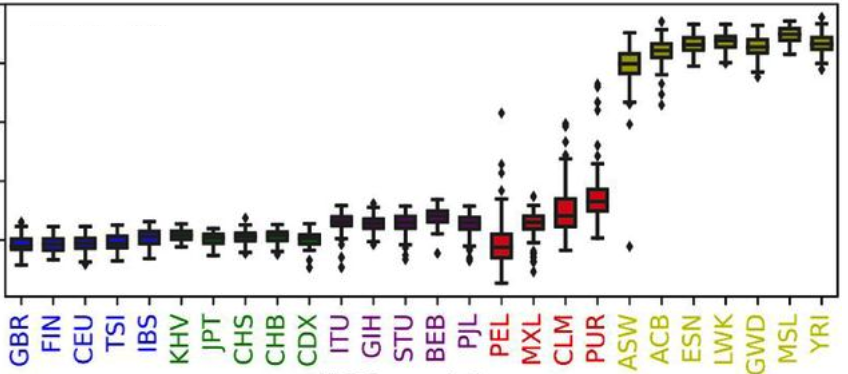

In [3]:
#All work goes here.

In [9]:
import os
import subprocess
import pandas as pd

# Directory where the filtered VCF files are stored
vcf_dir = 'filtered_pharmacogenomics_vcfs/'

# Step 1: Combine the VCF files into one summary file
vcf_files = [f for f in os.listdir(vcf_dir) if f.endswith('.GRCh38.GT.crossmap.vcf.gz')]  
output_file = '1000Genomes_Pharmacogenomic_combined.txt'

# Loop through each filtered VCF file and extract data
for vcf_file in vcf_files:
    vcf_path = os.path.join(vcf_dir, vcf_file)
    command = f"bcftools query -f '[%CHROM %POS %ID %SAMPLE %REF %ALT %GT\n]' {vcf_path} >> {output_file}"
    subprocess.run(command, shell=True, text=True)

# Read in the combined summary file
Pharmacogenomic = pd.read_csv(output_file, sep=" ", names=["Chr", "Pos", "rsID", "Sample", "REF", "ALT", "GT"])

# Display the first few rows of the DataFrame
Pharmacogenomic.head()


,Chr,Pos,rsID,Sample,REF,ALT,GT
0,chr8,2069296,rs17064642,HG00096,T,C,0|0
1,chr8,2069296,rs17064642,HG00097,T,C,0|0
2,chr8,2069296,rs17064642,HG00099,T,C,0|0
3,chr8,2069296,rs17064642,HG00100,T,C,0|1
4,chr8,2069296,rs17064642,HG00101,T,C,0|0


In [11]:
# Load the summary data
genomic_data = pd.read_csv('1000Genomes_Pharmacogenomic_combined.txt', sep=" ", names=["Chromosome", "Position", "VariantID", "SampleID", "Ref", "Alt", "Genotype"])
genomic_data.head()

# Load the population-sample mapping
population_info = pd.read_csv("igsr_1000genomes_phase3_release.tsv", sep="\t", usecols=['Population code', 'Sample name'])
population_info.head()

# Extract unique populations from the mapping
unique_populations = list(population_info['Population code'].dropna().unique())
for pop in unique_populations:
    print(pop, end=", ")

# Remove populations not relevant to the analysis
irrelevant_pops = ['GWJ', 'GWF', 'GWW', 'IBS,MSL', 'MKK']
unique_populations = [pop for pop in unique_populations if pop not in irrelevant_pops]
unique_populations.sort()
print("\nFiltered Populations:", unique_populations)

# Add population information to the genomic data
genomic_data_with_pop = pd.merge(genomic_data, population_info, left_on='SampleID', right_on='Sample name')
genomic_data_with_pop = genomic_data_with_pop.drop(columns=['Sample name'])
genomic_data_with_pop.head()

# Convert genotype to numeric values
def compute_numeric_genotype(gt):
    try:
        return sum(map(int, gt.replace("/", "|").split("|")))
    except ValueError:
        return np.nan  # Handle missing genotypes gracefully

genomic_data_with_pop['NumericGenotype'] = genomic_data_with_pop['Genotype'].apply(compute_numeric_genotype)
genomic_data_with_pop.head()

# Load variants of interest
variants_of_interest = []
with open("rsids_dbsnp.txt") as file:
    variants_of_interest = [line.strip() for line in file]
len(variants_of_interest)

# Compute frequencies by population
frequency_data = {'VariantID': variants_of_interest}

for pop in population_info['Population code'].unique():
    pop_data = genomic_data_with_pop[genomic_data_with_pop['Population code'] == pop]
    frequencies = []
    for variant in variants_of_interest:
        variant_data = pop_data[pop_data['VariantID'] == variant]
        total_alleles = 2 * len(variant_data.dropna(subset=['NumericGenotype']))
        freq = variant_data['NumericGenotype'].sum() / total_alleles if total_alleles > 0 else 0
        frequencies.append(freq)
    frequency_data[pop] = frequencies

# Convert to DataFrame
frequency_df = pd.DataFrame(frequency_data)

GBR, CHS, FIN, PUR, CLM, CDX, PEL, PJL, KHV, IBS, ACB, GWD, ESN, BEB, MSL, ITU, STU, CEU, YRI, JPT, CHB, LWK, MXL, ASW, TSI, GIH, IBS,MSL, 
Filtered Populations: ['ACB', 'ASW', 'BEB', 'CDX', 'CEU', 'CHB', 'CHS', 'CLM', 'ESN', 'FIN', 'GBR', 'GIH', 'GWD', 'IBS', 'ITU', 'JPT', 'KHV', 'LWK', 'MSL', 'MXL', 'PEL', 'PJL', 'PUR', 'STU', 'TSI', 'YRI']


In [2]:
import pandas as pd

# Replace 'your_file.tsv' with the path to your TSV file
file_path = 'Population_Variant_Frequency_Metadata.tsv'

# Load the TSV file into a DataFrame
df = pd.read_csv(file_path, sep='\t')

# Display the DataFrame
print(df)

df.head() 

        VariantID       GBR       CHS       FIN       PUR       CLM       CDX  \
0      rs17376848  0.032967  0.128571  0.050505  0.057692  0.085106  0.086022   
1      rs17376848  0.032967  0.128571  0.050505  0.057692  0.085106  0.086022   
2       rs2297595  0.082418  0.004762  0.196970  0.086538  0.063830  0.037634   
3       rs2297595  0.082418  0.004762  0.196970  0.086538  0.063830  0.037634   
4       rs1801265  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
37426   rs1045642  0.472527  0.695238  0.424242  0.572115  0.558511  0.575269   
37427   rs1045642  0.472527  0.695238  0.424242  0.572115  0.558511  0.575269   
37428   rs1045642  0.472527  0.695238  0.424242  0.572115  0.558511  0.575269   
37429   rs1045642  0.472527  0.695238  0.424242  0.572115  0.558511  0.575269   
37430   rs1045642  0.472527  0.695238  0.424242  0.572115  0.558511  0.575269   

            PEL       PJL  

,VariantID,GBR,CHS,FIN,PUR,CLM,CDX,PEL,PJL,KHV,...,MXL,ASW,TSI,GIH,"IBS,MSL",Chromosome,Position,Ref,Alt,level of evidence
0,rs17376848,0.032967,0.128571,0.050505,0.057692,0.085106,0.086022,0.111765,0.036458,0.111111,...,0.078125,0.04918,0.018692,0.014563,0.0,chr1,97450068.0,A,G,1A
1,rs17376848,0.032967,0.128571,0.050505,0.057692,0.085106,0.086022,0.111765,0.036458,0.111111,...,0.078125,0.04918,0.018692,0.014563,0.0,chr1,97450068.0,A,G,1A
2,rs2297595,0.082418,0.004762,0.196970,0.086538,0.063830,0.037634,0.029412,0.109375,0.040404,...,0.070312,0.04918,0.107477,0.033981,0.0,chr1,97699535.0,T,C,1A
3,rs2297595,0.082418,0.004762,0.196970,0.086538,0.063830,0.037634,0.029412,0.109375,0.040404,...,0.070312,0.04918,0.107477,0.033981,0.0,chr1,97699535.0,T,C,1A
4,rs1801265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,1A


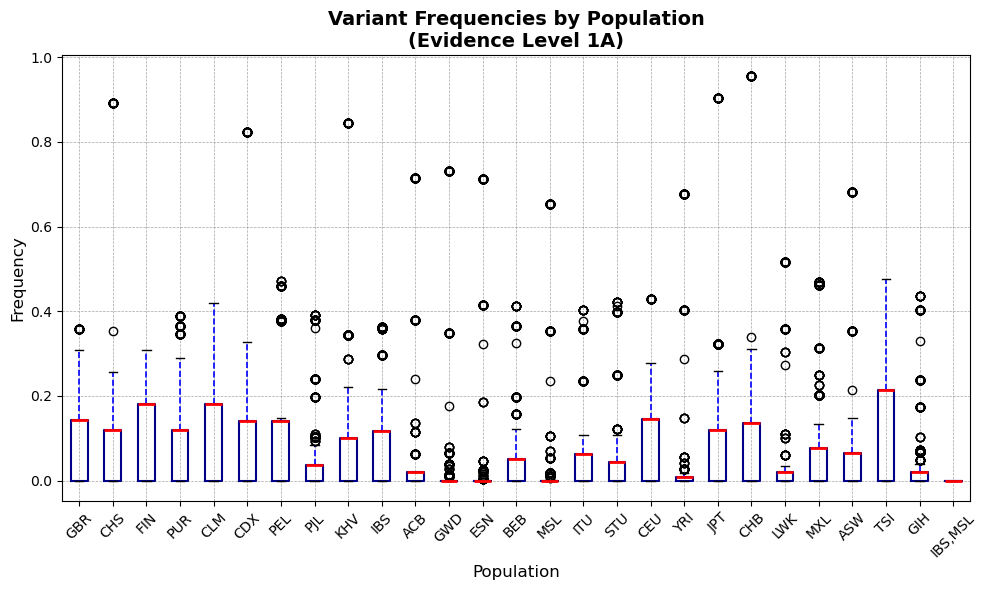

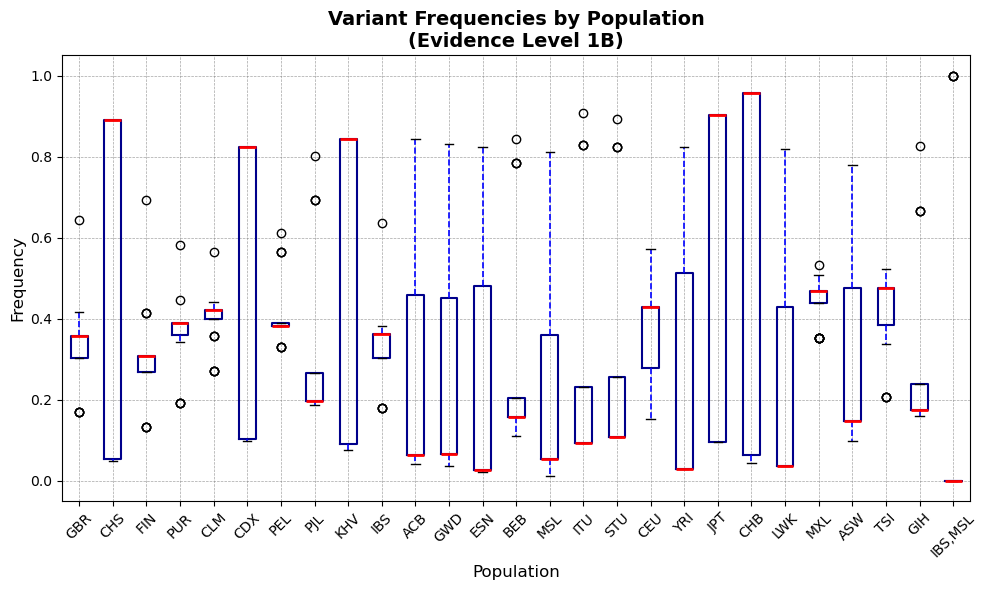

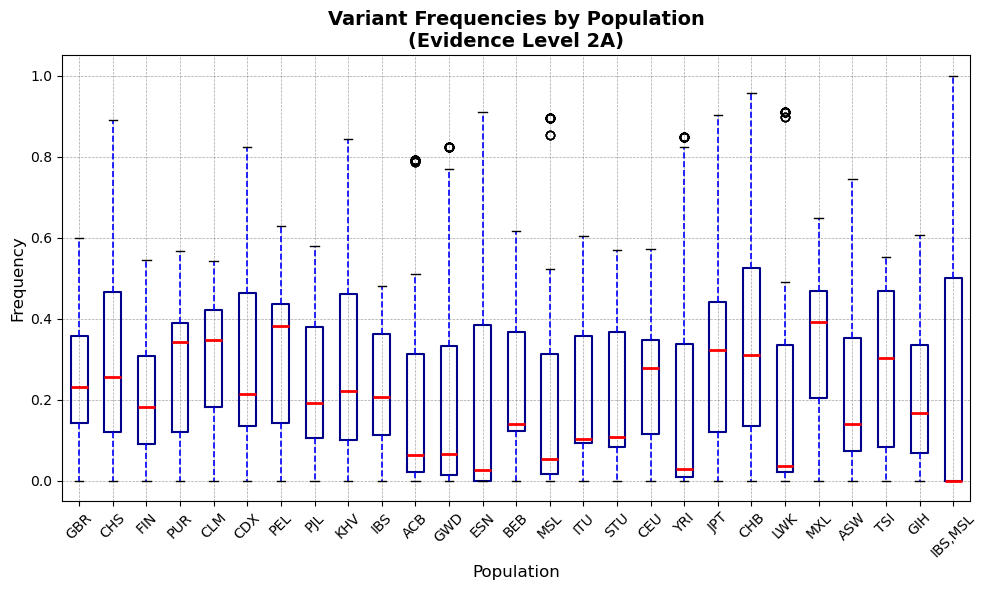

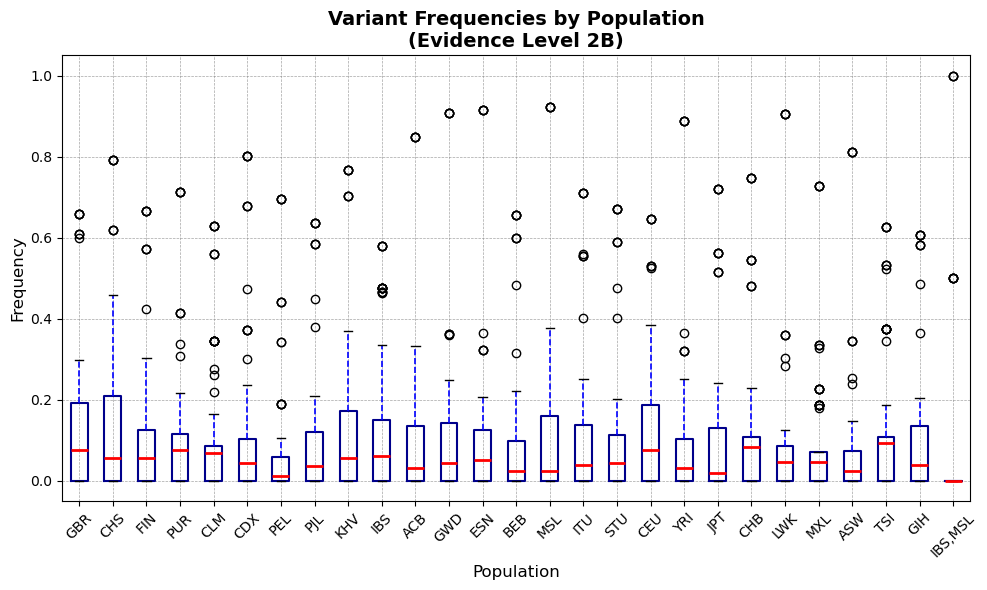

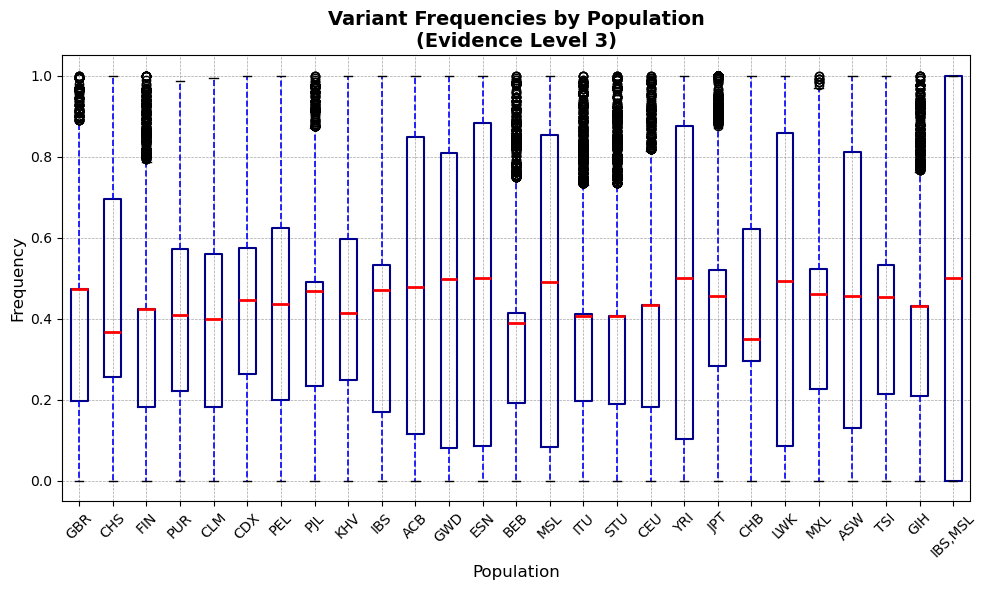

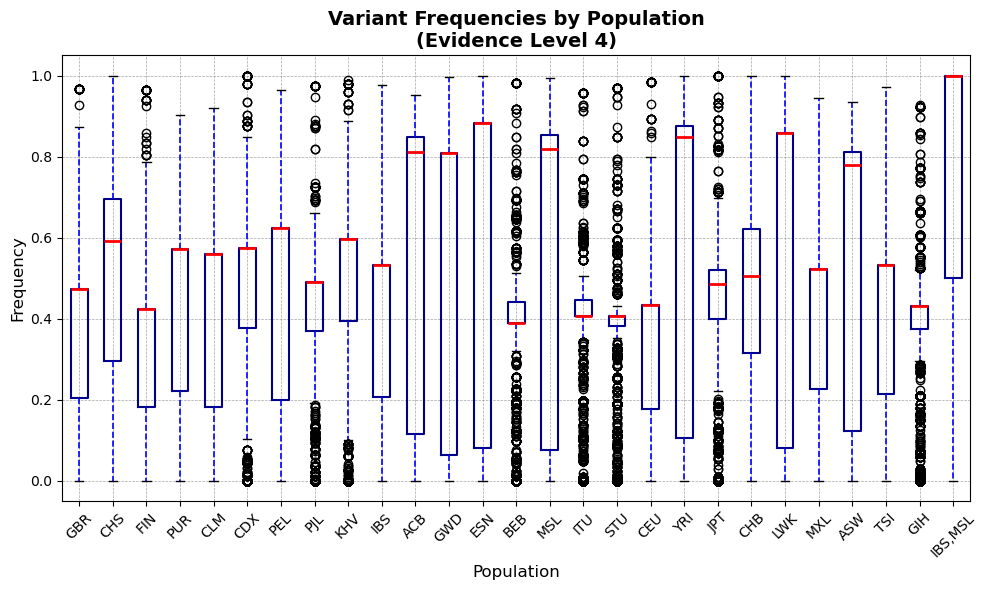

In [16]:
# Step 2: Annotate variants by level of evidence
genomic_data = pd.read_csv('1000Genomes_Pharmacogenomic_combined.txt', sep=" ", names=["Chromosome", "Position", "VariantID", "SampleID", "Ref", "Alt", "Genotype"])

metadata = genomic_data[['Chromosome', 'Position', 'Ref', 'Alt', 'VariantID']].drop_duplicates(subset='VariantID')
annotated_data = pd.merge(frequency_df, metadata, on="VariantID", how="left")

clinical_annotations = pd.read_csv(
    "clinicalVariants.tsv",
    sep="\t",
    usecols=['variant', 'level of evidence']
)
annotated_data = pd.merge(
    annotated_data,
    clinical_annotations,
    left_on="VariantID",
    right_on="variant",
    how="left"
).drop(columns=['variant'])

# Save the annotated data
annotated_data.to_csv('Population_Variant_Frequency_Metadata.tsv', sep="\t", index=False)


# Step 3: Visualize using boxplots
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot variant frequencies with improved aesthetics
def plot_variant_frequencies(data, evidence_level, populations):
    subset = data[data['level of evidence'] == evidence_level]
    # Increase figure size
    plt.figure(figsize=(10, 6))
    # Add color customization
    boxprops = dict(color="darkblue", linewidth=1.5)
    medianprops = dict(color="red", linewidth=2)
    whiskerprops = dict(color="blue", linewidth=1.2, linestyle="--")
    
    # Create the boxplot with custom styles
    subset[populations].boxplot(boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops)
    plt.title(f"Variant Frequencies by Population\n(Evidence Level {evidence_level})", fontsize=14, fontweight="bold")
    plt.ylabel("Frequency", fontsize=12)
    plt.xlabel("Population", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

# Generate boxplots
evidence_levels = annotated_data['level of evidence'].dropna().unique()
populations = population_info['Population code'].unique()

for level in sorted(evidence_levels):
    plot_variant_frequencies(annotated_data, level, populations)
    


<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>If you use R, please provide ample evidence of work.</p>
    <p>For R use, you should add appropriate screenshots and the R code here in this notebook as well. R code might not run for you on PACE-ICE Jupyter engine right now, but it will work for anyone replicating this work somehwere else (that anyone could be the "future you")</p>
</div>